In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.path.insert(1,'./code')
from utils import clean
from get_data_res import get_data
from visualize import plot_volumes
from GD_help import rotation_matrix_zyx
import GD_8mm
import GD_6_4mm
import GD_10mm

In [4]:
from get_data import get_data_all

#1. Visualize Data

There are three sets of data with 3 different resolutions. 
+ Volume with 6.4mm voxel, and the corresponding shape is (40,40,40)
+ Volume with 8mm voxel, and the corresponding shape is (32,32,32)
+ Volume with 10mm voxel, and the corresponding shape is (26,26,26)

In [5]:
dict_10mm, dict_8mm, dict_6_4mm = get_data_all()

In [ ]:
keys_8 = dict_8mm.keys()
print keys_8
list_8 = dict_8mm[keys_8[0]]

In [ ]:
import statsmodels.graphics.tsaplots as tsaplots
#plt.acorr(((list_8[0]-list_8[1])[0,:,:]).ravel())
tsaplots.plot_acf(((dict_8mm[keys_8[0]][0][0,:,:]-dict_8mm[keys_8[3]][0][0,:,:])).ravel(), lags=10);

In [ ]:
print np.std((dict_8mm[keys_8[0]][0][0,:,:]-dict_8mm[keys_8[0]][1][0,:,:]))
plt.hist((dict_8mm[keys_8[0]][0][0,:,:]-dict_8mm[keys_8[0]][1][0,:,:]), bins=20)
plt.show()

In [ ]:
for i in xrange(32):
    print np.std((dict_8mm[keys_8[0]][2][:,:,:]-dict_8mm[keys_8[0]][1][i,:,:]).ravel())

In [ ]:
plt.hist((dict_8mm[keys_8[0]][2][15,:,:]-dict_8mm[keys_8[0]][1][15,:,:]).ravel(),bins=30)
plt.show()

In [ ]:
dict_8mm[keys_8[0]][3][15,:,:]-dict_8mm[keys_8[0]][1][15,:,:]

In [ ]:
plt.hist2d(np.log(dict_8mm[keys_8[0]][3][18,:,:].ravel()), np.log(((dict_8mm[keys_8[0]][3][18,:,:]-dict_8mm[keys_8[0]][4][18,:,:])**2).ravel()),bins=40)
#plt.xlim([-0.005,0.015])
#plt.ylim([0,0.00000005])
plt.colorbar()
plt.show()

In [6]:
list_6_4mm, list_8mm, list_10mm = get_data()

### 6.4mm Voxel

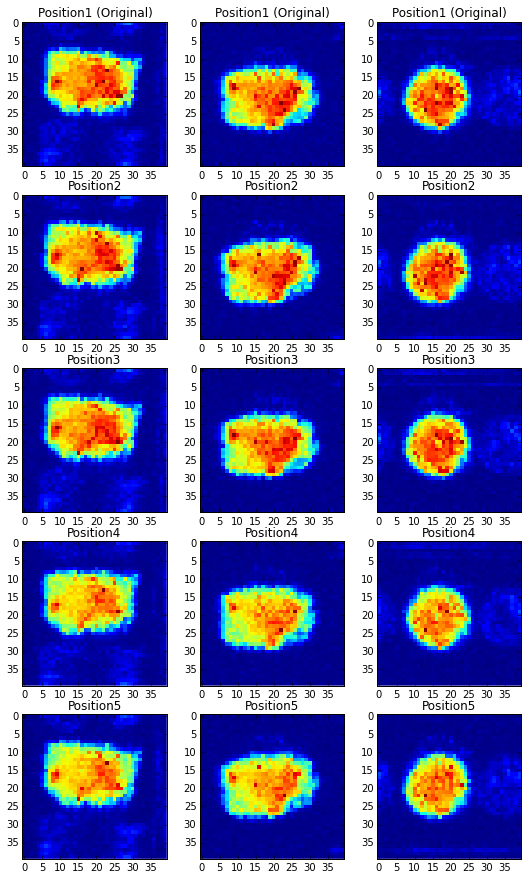

In [7]:
plot_volumes(list_6_4mm)

### 8mm Voxel

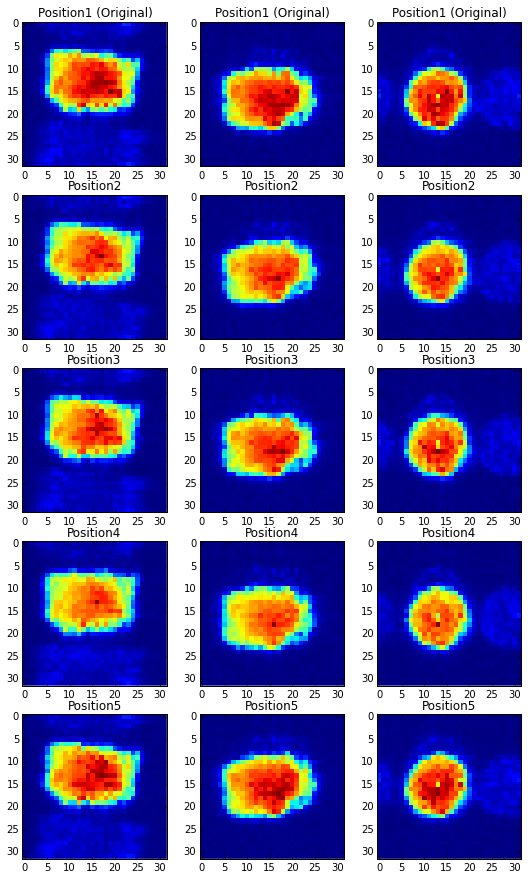

In [8]:
plot_volumes(list_8mm)

### 10mm Voxel

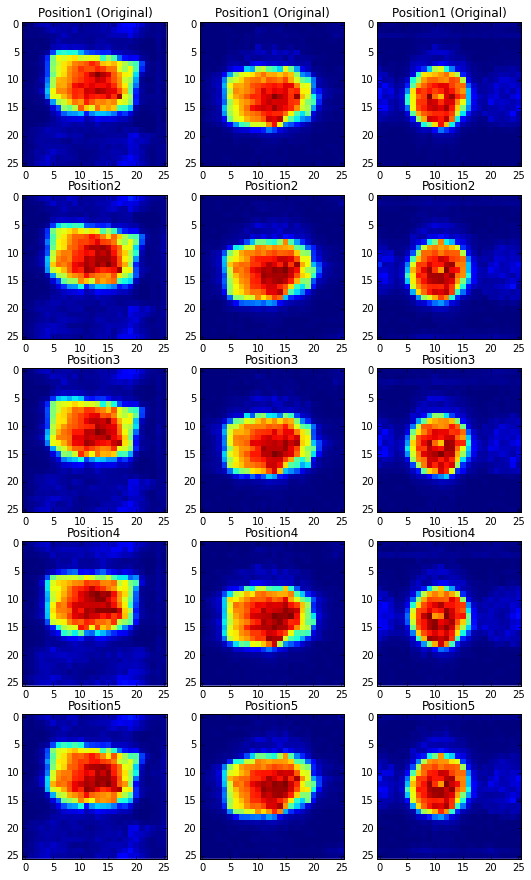

In [9]:
plot_volumes(list_10mm)

#2. Find Transformation Matrix Using Gradient Descent

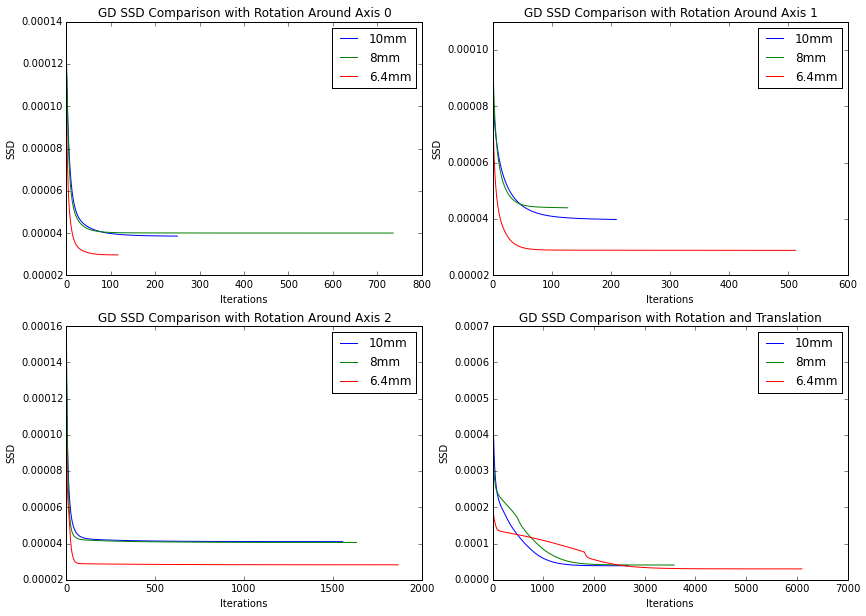

In [81]:
show_result(errors_10mm,errors_8mm,errors_6_4mm)

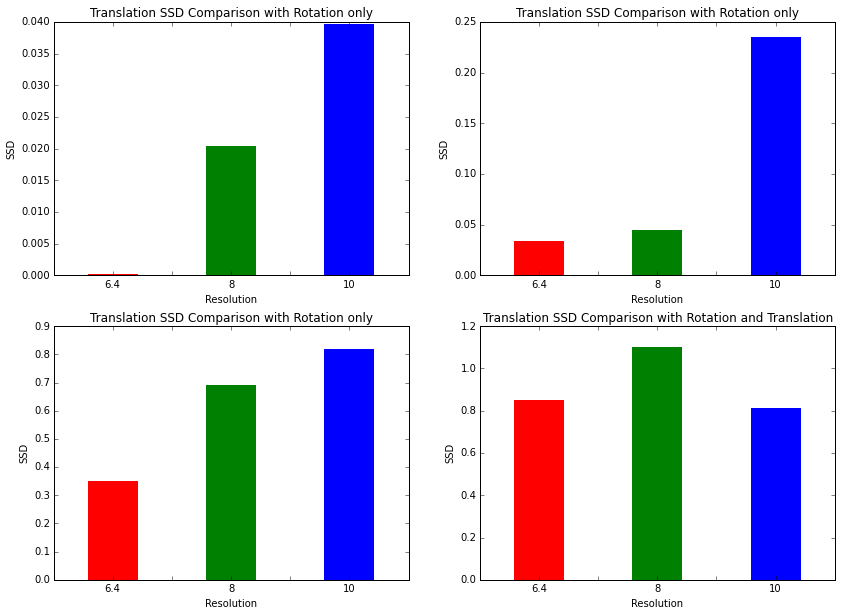

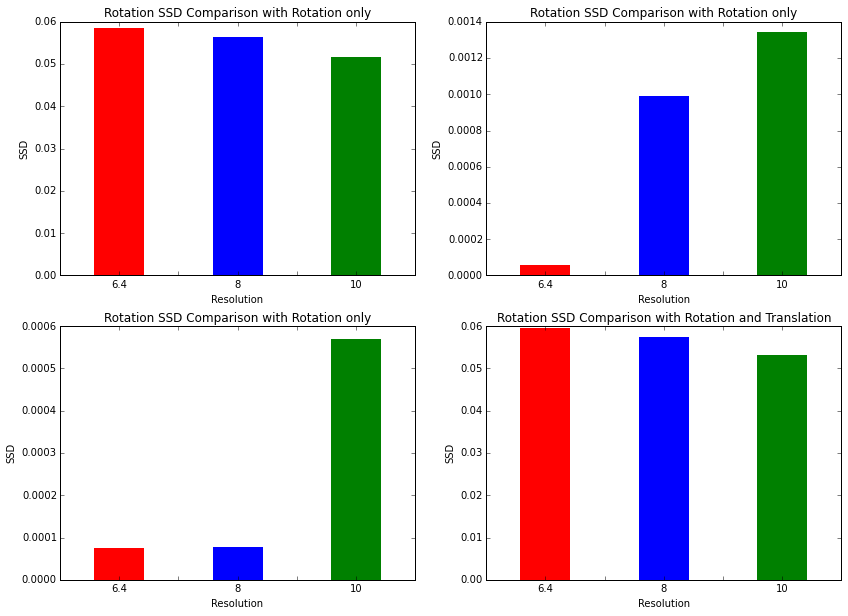

In [43]:
show_t(t_10mm,t_8mm,t_6_4mm)
show_R(R_10mm,R_8mm,R_6_4mm)

###Gradient Descent

In [7]:
errors_6_4mm = []
R_6_4mm = []
t_6_4mm = []
for i in xrange(1,5):
    R = rotation_matrix_zyx(0,0,0).astype('float32')
    t = np.zeros([3]).astype('float32')
    learning_rate = 0.2
    print 
    print 'Position 1 Vs Position ', i+1
    errors, R_res, t_res = GD_40.gradient_descent(list_6_4mm[0], list_6_4mm[i], R, t, learning_rate)
    errors_6_4mm.append(errors)
    R_6_4mm.append(R_res)
    t_6_4mm.append(t_res)


Position 1 Vs Position  2
Minimized error:  0.00108150505759
Rotation matrix R:
[[  9.96239781e-01  -2.79651349e-03  -4.30683314e-04]
 [  1.50819868e-03   9.97955382e-01  -8.77030268e-02]
 [ -7.13266025e-04   8.00526068e-02   9.96373773e-01]]
Translation vector t:
[-0.00014902  0.00046347  0.00260503]

Position 1 Vs Position  3
Minimized error:  0.0010509374533
Rotation matrix R:
[[  9.93290305e-01   8.50869641e-02   5.33332408e-04]
 [ -8.21040720e-02   1.00001264e+00   9.68866399e-04]
 [ -1.98155921e-03  -1.68140643e-04   9.99864936e-01]]
Translation vector t:
[ 0.02164021  0.01700272 -0.0090203 ]

Position 1 Vs Position  4
Minimized error:  0.0010286689826
Rotation matrix R:
[[  9.95488524e-01   6.04911125e-04  -8.63207504e-02]
 [ -2.82008084e-03   9.98672664e-01   9.11960087e-05]
 [  7.93485865e-02  -1.94178207e-03   9.95903254e-01]]
Translation vector t:
[ 0.04338024 -0.01115544 -0.08097467]

Position 1 Vs Position  5
Minimized error:  0.00109496472529
Rotation matrix R:
[[  9.974

In [8]:
errors_8mm = []
R_8mm = []
t_8mm = []
for i in xrange(1,5):
    R = rotation_matrix_zyx(0,0,0).astype('float32')
    t = np.zeros([3]).astype('float32')
    learning_rate = 0.2
    print 
    print 'Position 1 Vs Position ', i+1
    errors, R_res, t_res = GD.gradient_descent(list_8mm[0], list_8mm[i], R, t, learning_rate)
    errors_8mm.append(errors)
    R_8mm.append(R_res)
    t_8mm.append(t_res)


Position 1 Vs Position  2
Minimized error:  0.000883983049743
Rotation matrix R:
[[  9.99550819e-01  -8.77152779e-04  -2.68171047e-04]
 [  1.23601267e-03   9.98742223e-01  -8.52986723e-02]
 [  1.60098483e-03   7.61182681e-02   9.94783819e-01]]
Translation vector t:
[ 0.00303552 -0.01739623  0.00265359]

Position 1 Vs Position  3
Minimized error:  0.00097123663697
Rotation matrix R:
[[  9.92810130e-01   7.06611127e-02  -3.98767472e-04]
 [ -6.10297322e-02   1.00106370e+00   7.91546423e-04]
 [  2.08168698e-04   2.12007566e-04   9.99809563e-01]]
Translation vector t:
[ 0.01890525  0.01829567 -0.00041468]

Position 1 Vs Position  4
Minimized error:  0.000896528044403
Rotation matrix R:
[[  9.95932519e-01  -9.97922150e-04  -8.74892101e-02]
 [ -1.73959031e-03   9.98984158e-01   6.18544291e-04]
 [  7.91938081e-02  -2.67662108e-03   9.95279074e-01]]
Translation vector t:
[ 0.06844556 -0.01294503 -0.07708954]

Position 1 Vs Position  5
Minimized error:  0.000900101768865
Rotation matrix R:
[[ 0

In [9]:
errors_10mm = []
R_10mm = []
t_10mm = []
for i in xrange(1,5):
    R = rotation_matrix_zyx(0,0,0).astype('float32')
    t = np.zeros([3]).astype('float32')
    learning_rate = 0.2
    print 
    print 'Position 1 Vs Position ', i+1
    errors, R_res, t_res = GD_26.gradient_descent(list_10mm[0], list_10mm[i], R, t, learning_rate)
    errors_10mm.append(errors)
    R_10mm.append(R_res)
    t_10mm.append(t_res)


Position 1 Vs Position  2
Minimized error:  0.000546514936435
Rotation matrix R:
[[  9.99700010e-01  -6.89453009e-05  -4.47749699e-06]
 [ -3.73093132e-03   1.00086164e+00  -8.12224895e-02]
 [ -3.15666874e-03   6.56625330e-02   9.93497252e-01]]
Translation vector t:
[-0.00077392  0.01857925  0.00713845]

Position 1 Vs Position  3
Minimized error:  0.000564116061866
Rotation matrix R:
[[  9.95672047e-01   6.34530261e-02  -1.17463106e-03]
 [ -5.95850050e-02   1.00038755e+00  -1.94127881e-03]
 [  4.76489397e-04   3.30643670e-04   9.99634087e-01]]
Translation vector t:
[ 0.01621517  0.04565142  0.00096512]

Position 1 Vs Position  4
Minimized error:  0.00058123784022
Rotation matrix R:
[[  9.97779787e-01   1.41010751e-04  -8.39752555e-02]
 [ -4.36334434e-04   9.99506891e-01   7.22155164e-05]
 [  6.35826662e-02   3.38374521e-04   9.97486830e-01]]
Translation vector t:
[ 0.04911684 -0.00053465 -0.07603326]

Position 1 Vs Position  5
Minimized error:  0.000549198848452
Rotation matrix R:
[[  

#3. Maximum Likelihood Estimates

Instead of using cost function, I tried using maximum likelihood methods to estimate the rotation. I'm still working on a rigorous proof of the model, but as of right  now, I will demonstrate the result from the data.(Here we are using the two volumes from part 1 with 5 degrees rotation.)

Let's denote the image without movement as `im1` and the image after movement as `im2`. If the `im2` has been rotated back to the original position perfectly, then $$im2 = im1 + \lambda\epsilon$$, where $\epsilon$ is the noise of the image which we know is normally distributed, and $\lambda$ is a scaling constant. We will now compute the difference $\frac{im2-im1}{\lambda}$ and assume it also follows a normal distribution and then do maximum likelihood estimation on the difference.

In [213]:
from scipy.stats import norm
def hist_diff(thetas, t, k):
    fig, ax = plt.subplots(3,4)
    fig.set_figwidth(20)
    fig.set_figheight(12)
    for idx,th in enumerate(thetas):
        if(k == 1):
            R = rotation_matrix_zyx(th,0,0)
        if(k == 3):
            R = rotation_matrix_zyx(0,th,0)
        if(k == 2):
            R = rotation_matrix_zyx(0,0,th)

        new_vol2 = transform(list_6_4mm[k], R, t)
        data = ((new_vol2-list_6_4mm[0])/np.sqrt(new_vol2**2+list_6_4mm[0]**2)).ravel()
        #data = ((new_vol2**2-list_6_4mm[0]**2)/(new_vol2**2+list_6_4mm[0]**2)).ravel()
        std = np.std(data)
        ax[0][idx].hist(data, bins=100, alpha = 0.6, normed=True, label='std = %.3f'%(std))
        ax[0][idx].set_title('6.4mm Res Vol2 rotated %s degrees' % -th)
        ax[0][idx].legend()

        new_vol2 = transform(list_8mm[k], R, t)
        data = ((new_vol2-list_8mm[0])/np.sqrt(new_vol2**2+list_8mm[0]**2)).ravel()
        #data = ((new_vol2**2-list_8mm[0]**2)/(new_vol2**2+list_8mm[0]**2)).ravel()
        std = np.std(data)
        ax[1][idx].hist(data, bins=100, alpha = 0.6, normed=True, label='std = %.3f'%std)
        ax[1][idx].set_title('8mm Res Vol2 rotated %s degrees' % -th)
        ax[1][idx].legend()

        new_vol2 = transform(list_10mm[k], R, t)
        data = ((new_vol2-list_10mm[0])/np.sqrt(new_vol2**2+list_10mm[0]**2)).ravel()
        #data = ((new_vol2**2-list_10mm[0]**2)/(new_vol2**2+list_10mm[0]**2)).ravel()
        std = np.std(data)
        ax[2][idx].hist(data, bins=100, alpha = 0.6, normed=True, label='std = %.3f'%std)
        ax[2][idx].set_title('10mm Res Vol2 rotated %s degrees' % -th)
        ax[2][idx].legend()
        plt.title('Vol2 rotated %s degrees' % -th)
    plt.show()
    plt.close(fig)

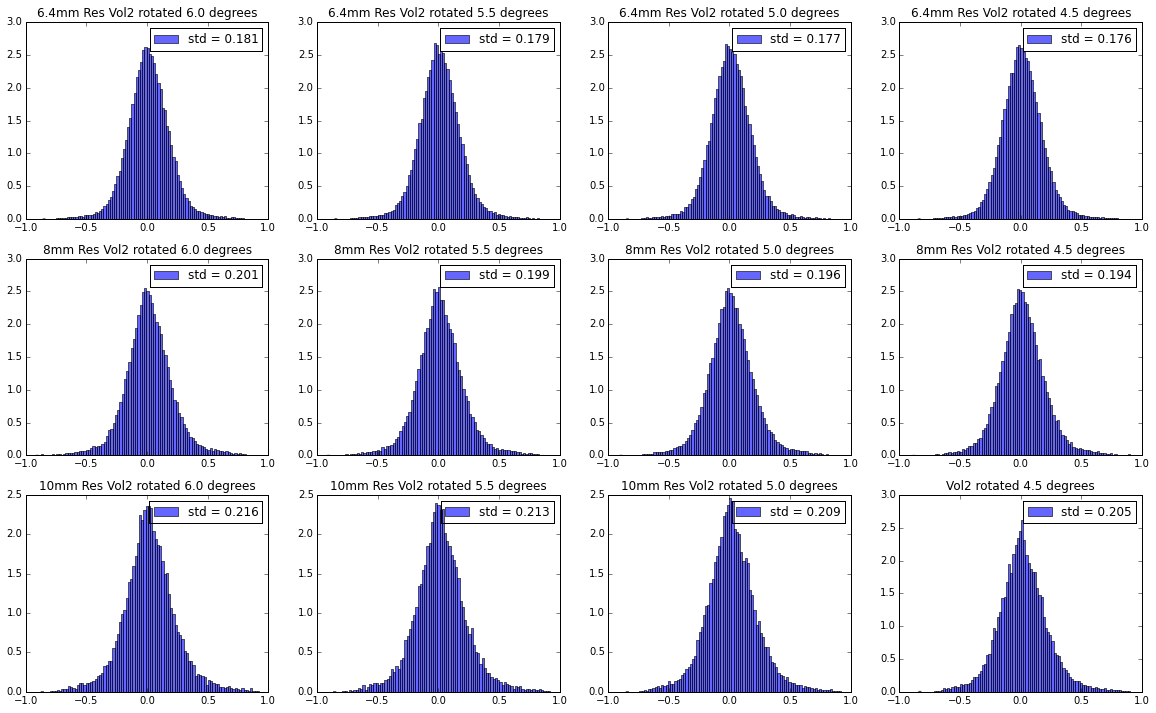

In [214]:
# For Rotation along axis 0
thetas=np.arange(-6,-4,0.5)
t = np.zeros([3,])
k = 1
hist_diff(thetas, t, k)

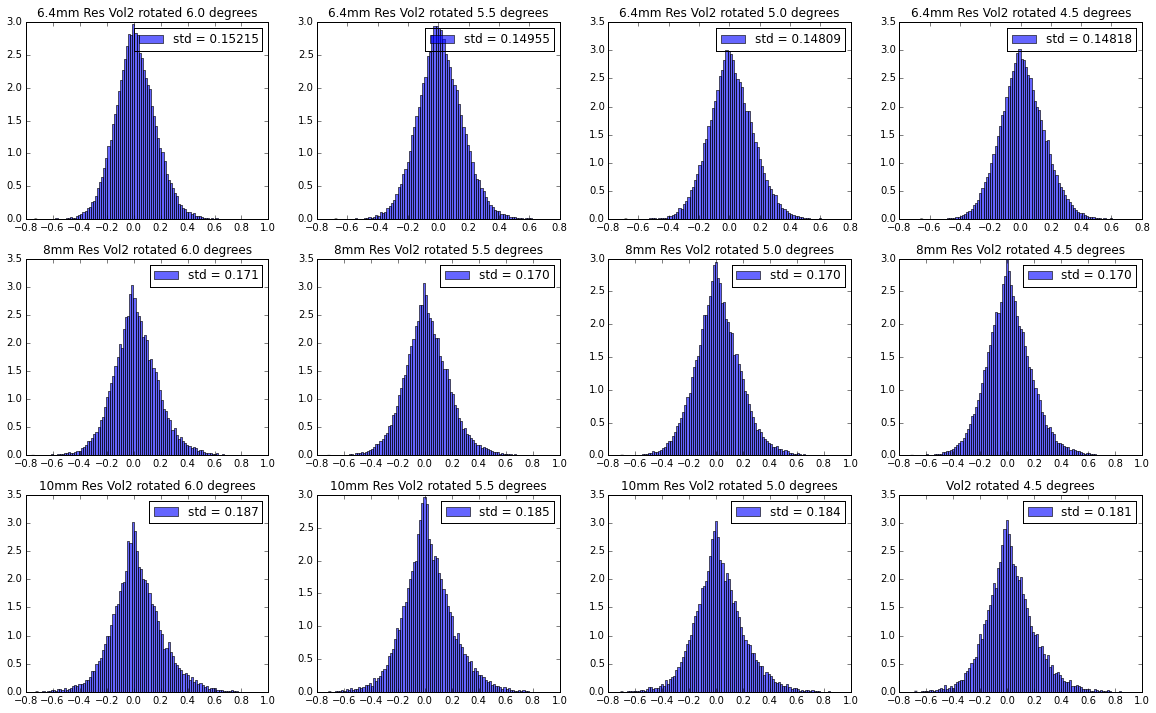

In [141]:
# For Rotation along axis 1
thetas=np.arange(-6,-4,0.5)
t = np.zeros([3,])
k = 3
hist_diff(thetas, t, k)

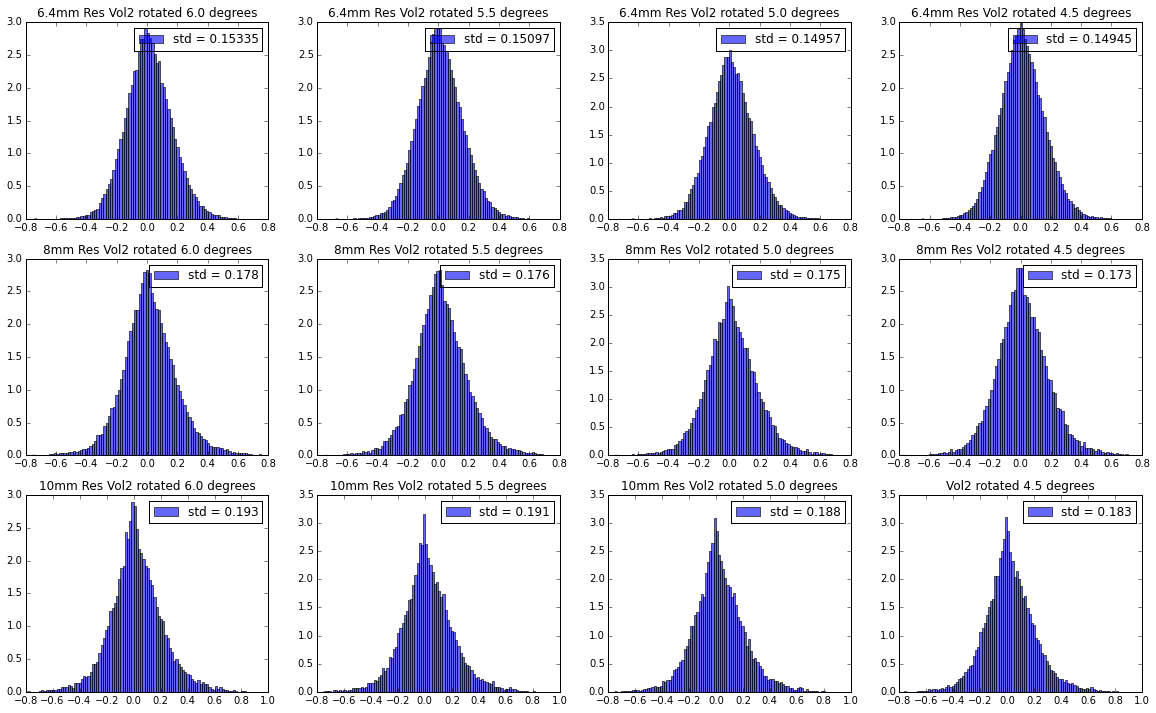

In [142]:
# For Rotation along axis 2
thetas=np.arange(-6,-4,0.5)
t = np.zeros([3,])
k = 2
hist_diff(thetas, t, k)

In [247]:
import matplotlib.pyplot as plt
import os
import math
import time
import numpy as np
import scipy
def Maximum_Likelihood(vol1, vol2, thetas, t, axis, arg):
    '''
    vol1: original image
    vol2: volume to be rotated
    thetas: list of degress to try
    cf: cost function
    arg: string for plot titles
    '''
    prob = np.zeros(len(thetas))
    for idx, th in enumerate(thetas):
        if(axis == 0):
            R = rotation_matrix_zyx(th,0,0)
        if(axis == 1):
            R = rotation_matrix_zyx(0,th,0)
        if(axis == 2):
            R = rotation_matrix_zyx(0,0,th)
        new_vol2 = transform(vol2, R, t)
        #((new_vol2-vol1)/np.sqrt(abs(new_vol2)+abs(vol1))).ravel()
        data = ((new_vol2-vol1)).ravel()#/np.sqrt(abs(new_vol2)+abs(vol1))).ravel()
        sig = np.sqrt(4.9e-5)/2.0
        prob[idx] = np.sum(scipy.stats.norm.logpdf(data,loc = 0,scale=sig))
    cumsum = np.cumsum(np.exp(prob-np.max(prob)))
    cumsum = cumsum/cumsum[-1]
    plt.plot(thetas, cumsum, label='Cumulative Sum')
    plt.grid()
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Log Likelihood')
    plt.legend()
    plt.show()
    pMin = thetas[np.argmax(prob)]
    plt.plot(thetas, np.exp(prob-np.max(prob)), label='Max prob occurs at = %s' % (pMin))
    plt.title('ML for %s mm Resolution' % arg, fontsize=14)
    plt.grid()
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Likelihood')
    plt.legend(fontsize=12)
    plt.show()
    return prob

def calc_CI(prob):
    cumsum = np.cumsum(np.exp(prob-np.max(prob)))
    cumsum = cumsum/cumsum[-1]
    return [np.max(thetas[cumsum < 0.025]),np.min(thetas[cumsum > 0.975])]

### Rotation Around Axis 0

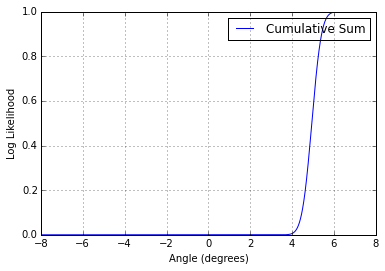

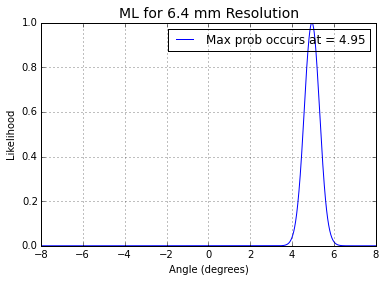

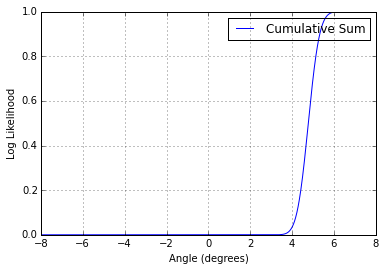

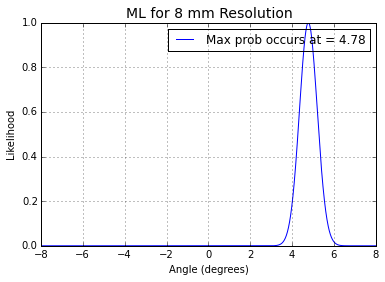

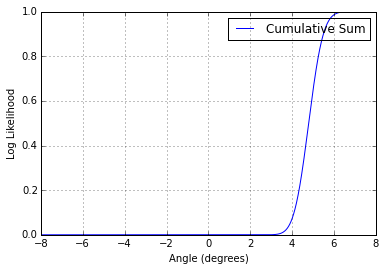

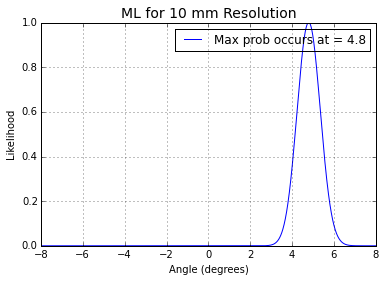

In [248]:
thetas = np.arange(-8,8,0.01)
t = np.zeros([3])
prob_6_4 = Maximum_Likelihood(list_6_4mm[0],list_6_4mm[1],thetas, t, 0, '6.4')
prob_8 = Maximum_Likelihood(list_8mm[0],list_8mm[1],thetas, t, 0, '8')
prob_10 = Maximum_Likelihood(list_10mm[0],list_10mm[1],thetas, t, 0,'10')

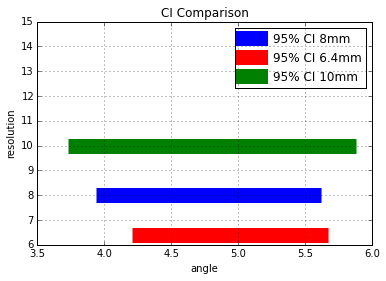

In [249]:
plot_CI(calc_CI(prob_8), calc_CI(prob_6_4), calc_CI(prob_10))

### Rotation Around Axis 2

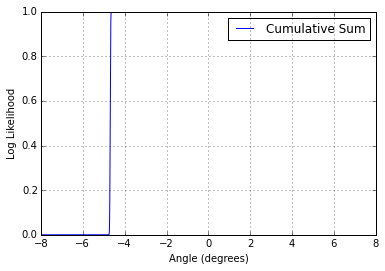

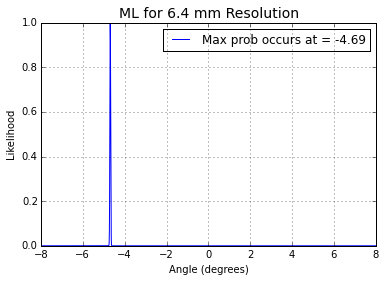

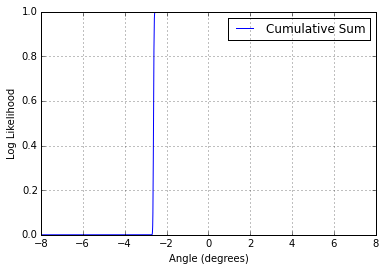

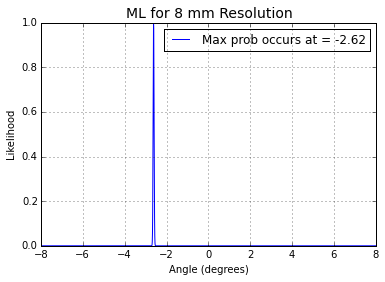

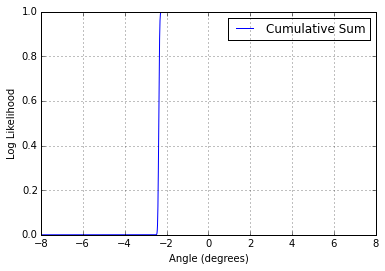

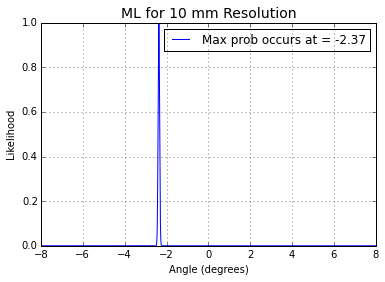

In [224]:
thetas = np.arange(-8,8,0.01)
t = np.zeros([3])
prob_6_4 = Maximum_Likelihood(list_6_4mm[0],list_6_4mm[2],thetas, t, 2, '6.4')
prob_8 = Maximum_Likelihood(list_8mm[0],list_8mm[2],thetas, t, 2, '8')
prob_10 = Maximum_Likelihood(list_10mm[0],list_10mm[2],thetas, t, 2, '10')

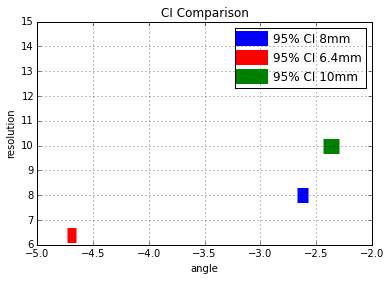

In [225]:
plot_CI(calc_CI(prob_8), calc_CI(prob_6_4), calc_CI(prob_10))

### Rotation Around Axis 1

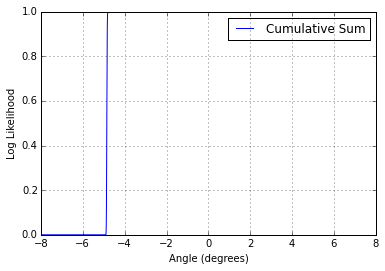

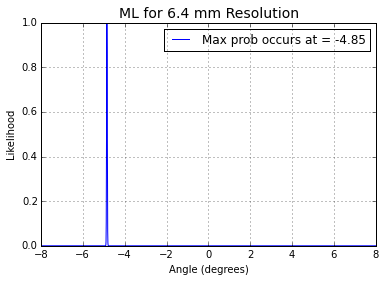

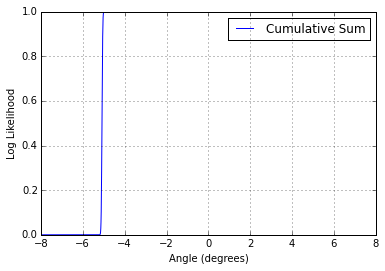

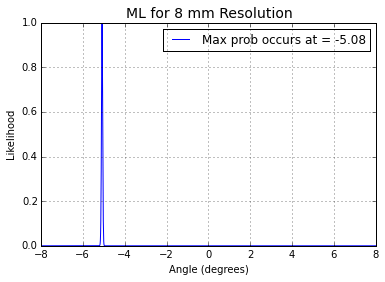

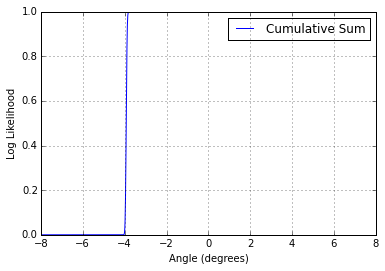

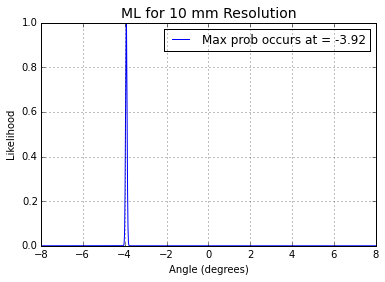

In [118]:
thetas = np.arange(-8,8,0.01)
t = np.zeros([3])
prob_6_4 = Maximum_Likelihood(list_6_4mm[0],list_6_4mm[3],thetas, t, 1, '6.4')
prob_8 = Maximum_Likelihood(list_8mm[0],list_8mm[3],thetas, t, 1, '8')
prob_10 = Maximum_Likelihood(list_10mm[0],list_10mm[3],thetas, t, 1, '10')

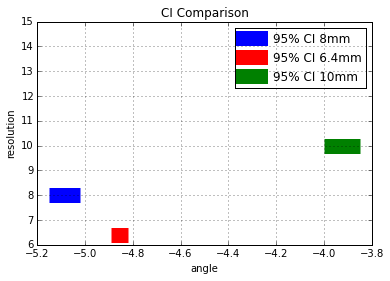

In [119]:
plot_CI(calc_CI(prob_8), calc_CI(prob_6_4), calc_CI(prob_10))

### Distribution for Bessel Interpolation

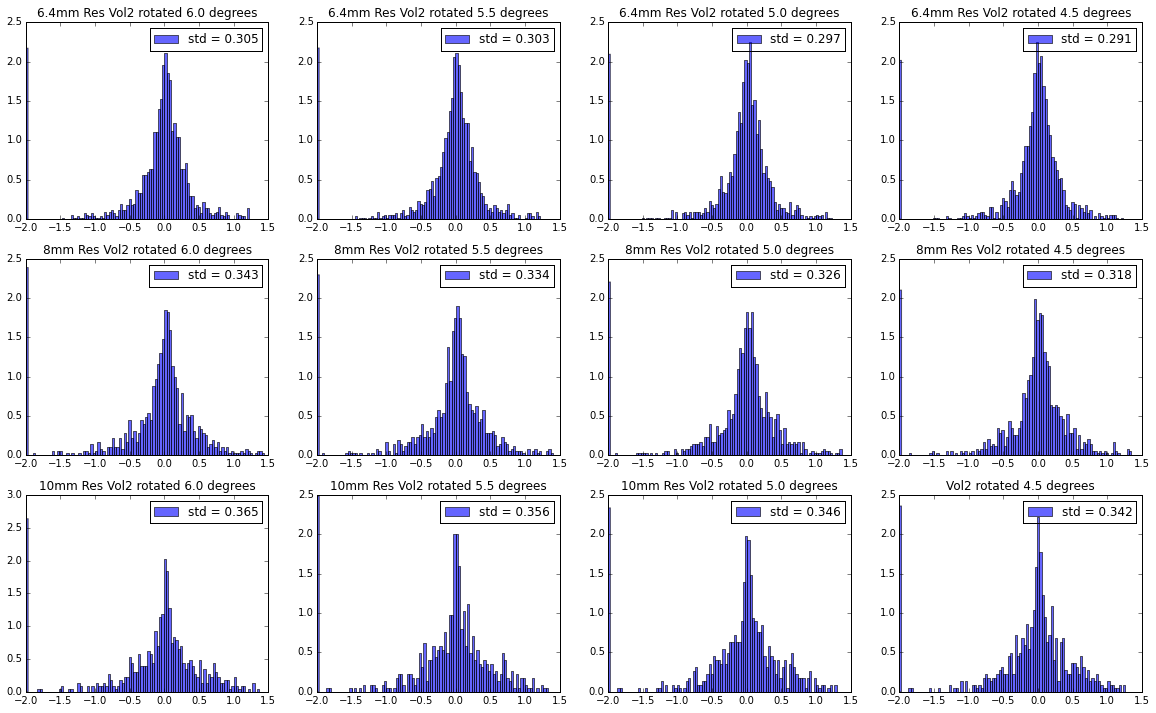

In [20]:
thetas=np.arange(-6,-4,0.5)
t = np.zeros([3,])
sig = 0.24
k = 3
x = np.linspace(-2, 2, 100)
y = norm.pdf(x, 0, sig)
fig, ax = plt.subplots(3,4)
fig.set_figwidth(20)
fig.set_figheight(12)
for idx,th in enumerate(thetas):    
    new_vol2 = bessel_rotate(list_6_4mm[k].max(axis=0), th)
    std = np.std((new_vol2-list_6_4mm[0].max(axis=0))/(new_vol2+list_6_4mm[0].max(axis=0)))
    ax[0][idx].hist((2.*(new_vol2-list_6_4mm[0].max(axis=0))/(new_vol2+list_6_4mm[0].max(axis=0))).ravel(), 
                    bins=100, alpha = 0.6, normed=True, label='std = %.3f'%std)
    ax[0][idx].set_title('6.4mm Res Vol2 rotated %s degrees' % -th)
    ax[0][idx].legend()

    new_vol2 = bessel_rotate(list_8mm[k].max(axis=0), th)
    std = np.std((new_vol2-list_8mm[0].max(axis=0))/(new_vol2+list_8mm[0].max(axis=0)))
    ax[1][idx].hist((2.*(new_vol2-list_8mm[0].max(axis=0))/(new_vol2+list_8mm[0].max(axis=0))).ravel(), 
                    bins=100, alpha = 0.6, normed=True, label='std = %.3f'%std)
    ax[1][idx].set_title('8mm Res Vol2 rotated %s degrees' % -th)
    ax[1][idx].legend()
    
    new_vol2 = bessel_rotate(list_10mm[k].max(axis=0), th)
    std = np.std((new_vol2-list_10mm[0].max(axis=0))/(new_vol2+list_10mm[0].max(axis=0)))
    ax[2][idx].hist((2.*(new_vol2-list_10mm[0].max(axis=0))/(new_vol2+list_10mm[0].max(axis=0))).ravel(), 
                    bins=100, alpha = 0.6, normed=True, label='std = %.3f'%std)
    ax[2][idx].set_title('10mm Res Vol2 rotated %s degrees' % -th)
    ax[2][idx].legend()
    #plt.plot(x, y,'r-', lw=5, alpha=0.6, label = 'pdf of $N(0,0.2^2)$')
    plt.title('Vol2 rotated %s degrees' % -th)
plt.show()
plt.close(fig)

In [43]:
def Maximum_Likelihood_bessel(vol1, vol2, thetas, t, sig, axis, arg):
    '''
    vol1: original image
    vol2: volume to be rotated
    thetas: list of degress to try
    cf: cost function
    arg: string for plot titles
    '''
    prob = np.zeros(len(thetas))
    for idx, th in enumerate(thetas):
        print idx,
        new_vol2 = np.zeros(vol2.shape)
        for i in xrange(vol2.shape[0]):
            if(axis == 0):
                new_vol2[i,:,:] = bessel_rotate(vol2[i,:,:],th)
            if(axis == 1):
                new_vol2[:,i,:] = bessel_rotate(vol2[:,i,:],th)
            if(axis == 2):
                new_vol2[:,:,i] = bessel_rotate(vol2[:,:,i],th)
        
        prob[idx] = np.sum(scipy.stats.norm.logpdf((2*(new_vol2-vol1)/(new_vol2+vol1)).ravel(),loc = 0,scale=sig))
        #prob[idx] = np.sum(scipy.stats.norm.logpdf((new_vol2-vol1).ravel(),loc = 0,scale=sig))
    cumsum = np.cumsum(np.exp(prob-np.max(prob)))
    cumsum = cumsum/cumsum[-1]
    plt.plot(thetas, cumsum, label='Cumulative Sum')
    plt.grid()
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Log Likelihood')
    plt.legend()
    plt.show()
    pMin = thetas[np.argmax(prob)]
    plt.plot(thetas, np.exp(prob-np.max(prob)), label='Max prob occurs at = %s' % (pMin))
    plt.title('ML for %s mm Resolution' % arg, fontsize=14)
    plt.grid()
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Likelihood')
    plt.legend(fontsize=12)
    plt.show()
    return prob

0 1 2 3 4 5

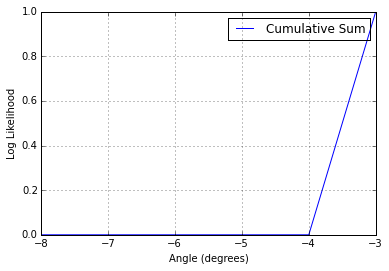

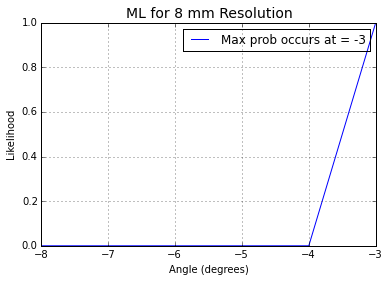

 0 1 2 3 4 5

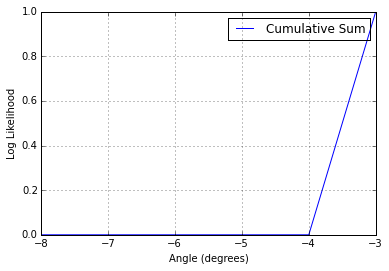

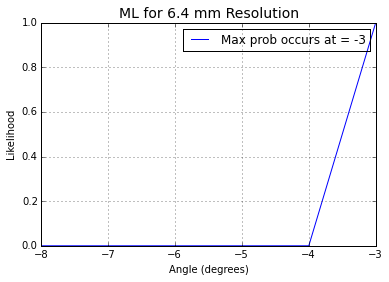

 0 1 2 3 4 5

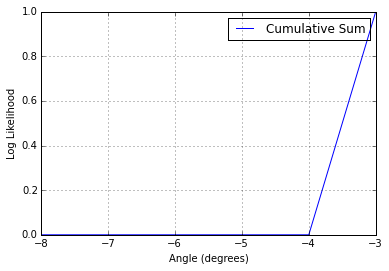

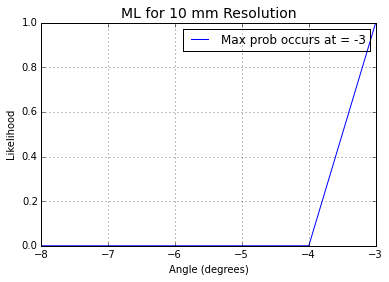

In [49]:
thetas = np.arange(-8,-2,1)
t = np.zeros([3])
prob_8 = Maximum_Likelihood_bessel(list_8mm[0],list_8mm[3],thetas, t, 0.3, 0, '8')
prob_6_4 = Maximum_Likelihood_bessel(list_6_4mm[0],list_6_4mm[3],thetas, t, 0.3, 0, '6.4')
prob_10 = Maximum_Likelihood_bessel(list_10mm[0],list_10mm[3],thetas, t, 0.3, 0,'10')

In [89]:
import matplotlib.pyplot as plt
import os
import math
import time
import numpy as np
import scipy

def transform(volume,R,t):
    # find center of the volume
    ox = volume.shape[1]/2.-0.5
    oy = volume.shape[0]/2.-0.5
    oz = volume.shape[2]/2.-0.5

    tmpx = np.linspace(0, volume.shape[1]-1, volume.shape[1])
    tmpy =  np.linspace(0, volume.shape[0]-1, volume.shape[0])
    tmpz =  np.linspace(0, volume.shape[2]-1, volume.shape[2])
    
    xx, yy, zz = np.meshgrid(tmpx, tmpx, tmpx)
    x, y, z = xx - ox, yy - oy, zz - oz
    dest_x, dest_y, dest_z = ((R[0][0]*x + R[0][1]*y + R[0][2]*z) + ox + t[0], 
                              (R[1][0]*x + R[1][1]*y + R[1][2]*z) + oy + t[1], 
                              (R[2][0]*x + R[2][1]*y + R[2][2]*z) + oz + t[2])
    dest = trilinear_interp(volume, dest_x, dest_y, dest_z)
    return dest

    
# Trilinear Interpolation
def trilinear_interp(volume, x, y, z):
    # find the closest grid of the target points
    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1
    z0 = np.floor(z).astype(int)
    z1 = z0 + 1
    
    # Clip
    x0 = (x0 + volume.shape[0]) % volume.shape[0]
    x1 = (x1 + volume.shape[0]) % volume.shape[0]
    y0 = (y0 + volume.shape[1]) % volume.shape[1]
    y1 = (y1 + volume.shape[1]) % volume.shape[1]
    z0 = (z0 + volume.shape[2]) % volume.shape[2]
    z1 = (z1 + volume.shape[2]) % volume.shape[2]
    
    x = (x + volume.shape[0]) % volume.shape[0]
    y = (y + volume.shape[1]) % volume.shape[1]
    z = (z + volume.shape[2]) % volume.shape[2]
    '''
    x0 = x0.clip(0, volume.shape[0]-1)
    x1 = x1.clip(0, volume.shape[0]-1)
    y0 = y0.clip(0, volume.shape[1]-1)
    y1 = y1.clip(0, volume.shape[1]-1)
    z0 = z0.clip(0, volume.shape[2]-1)
    z1 = z1.clip(0, volume.shape[2]-1) 
    '''
    # define some coefficients
    xd = x-x0
    yd = y-y0
    zd = z-z0
    
    # set up for the bilinear interpolation

    C00 = volume[y0,x0,z0]*(1-xd) + volume[y0,x1,z0]*xd
    C10 = volume[y1,x0,z0]*(1-xd) + volume[y1,x1,z0]*xd
    
    C01 = volume[y0,x0,z1]*(1-xd) + volume[y0,x1,z1]*xd
    C11 = volume[y1,x0,z1]*(1-xd) + volume[y1,x1,z1]*xd
    
    C0 = C00*(1-yd) + C10*yd
    C1 = C01*(1-yd) + C11*yd
    
    C = C0*(1-zd) + C1*zd
    return C

def to_radian(theta):
    '''
    Convert theta from degrees to radians
    '''
    return theta*np.pi/180.

def rotation_matrix_zyx(gamma, beta, alpha):
    """
    Return the rotation matrix associated with counterclockwise rotation 
    about x axis by gamma degrees
    about y axis by beta degrees
    about z axis by alpha degrees
    """
    # convert degrees to radians
    gamma = to_radian(gamma)
    beta = to_radian(beta)
    alpha = to_radian(alpha)
    
    rz = np.array([[np.cos(alpha),-np.sin(alpha),0],[np.sin(alpha),np.cos(alpha),0],[0,0,1]])
    ry = np.array([[np.cos(beta),0, np.sin(beta)],[0, 1, 0],[-np.sin(beta),0,np.cos(beta)]])
    rx = np.array([[1,0,0],[0,np.cos(gamma),-np.sin(gamma)],[0,np.sin(gamma),np.cos(gamma)]])
    return (rz.dot(ry)).dot(rx)

In [111]:
def plot_CI(CI_8, CI_6_4, CI_10):
    plt.hlines(8,CI_8[0], CI_8[1], color = 'blue',lw=15,label='95% CI 8mm')
    plt.hlines(6.4,CI_6_4[0], CI_6_4[1], color = 'red',lw=15,label='95% CI 6.4mm')
    plt.hlines(10,CI_10[0], CI_10[1], color = 'green',lw=15,label='95% CI 10mm')
    plt.title('CI Comparison')
    plt.xlabel('angle')
    plt.ylabel('resolution')
    plt.legend()
    plt.ylim([6,15])
    plt.grid()
    plt.show()
    
sums = np.zeros([3,])
for l in xrange(5):
    sums[0] += np.sum(list_6_4mm[l])
    sums[1] += np.sum(list_8mm[l])
    sums[2] += np.sum(list_10mm[l])
sums = sums/5.
def show_result(errors_10mm,errors_8mm,errors_6_4mm):
    fig, ax = plt.subplots(2,2)
    fig.set_figwidth(14)
    fig.set_figheight(10)
    ax = ax.ravel()
    for i in xrange(len(ax)):
        ax[i].plot(errors_10mm[i]/sums[2],label='10mm')
        ax[i].plot(errors_8mm[i]/sums[1],label='8mm')
        ax[i].plot(errors_6_4mm[i]/sums[0],label='6.4mm')
        if(i == 3):
            ax[i].set_title('GD SSD Comparison with Rotation and Translation')
        else:
            ax[i].set_title('GD SSD Comparison with Rotation Around Axis %s' % i)
        ax[i].set_xlabel('Iterations')
        ax[i].set_ylabel('SSD')
        ax[i].legend()
    plt.show()
    plt.close(fig)
    
def show_R(R_10mm,R_8mm,R_6_4mm):
    fig, ax = plt.subplots(2,2)
    fig.set_figwidth(14)
    fig.set_figheight(10)
    ax = ax.ravel()
    correct_r = [rotation_matrix_zyx(-5,0,0),rotation_matrix_zyx(0,0,-5),
             rotation_matrix_zyx(0,-5,0),rotation_matrix_zyx(-5,0,0)]
    for i in xrange(len(ax)):
        ax[i].vlines(1.5,0,np.sum((R_8mm[i]-correct_r[i])**2),'blue',lw = 50,label='8mm')
        ax[i].vlines(2.5,0,np.sum((R_10mm[i]-correct_r[i])**2),'green',lw = 50,label='10mm')
        ax[i].vlines(0.5,0,np.sum((R_6_4mm[i]-correct_r[i])**2),'red',lw = 50,label='6.4mm')
        if(i == 3):
            ax[i].set_title('Rotation SSD Comparison with Rotation and Translation')
        else:
            ax[i].set_title('Rotation SSD Comparison with Rotation only')
        ax[i].set_xlabel('Resolution')
        ax[i].set_xticklabels(['','6.4','','8','','10'])
        #ax[i].xaxis.set_major_formatter(plt.NullFormatter())
        ax[i].set_ylabel('SSD')
        ax[i].set_xlim([0,3])
        #ax[i].legend()
    plt.show()
    plt.close(fig)
    
def show_t(t_10mm,t_8mm,t_6_4mm):
    fig, ax = plt.subplots(2,2)
    fig.set_figwidth(14)
    fig.set_figheight(10)
    ax = ax.ravel()
    correct_t = [np.array([0,0,0]),np.array([0,0,0]),np.array([0,0,0]),np.array([0,-10.,0])]
    for i in xrange(len(ax)):
        ax[i].vlines(1.5,0,np.sum((t_8mm[i]*8.-correct_t[i])**2),'green',lw = 50,label='8mm')
        ax[i].vlines(2.5,0,np.sum((t_10mm[i]*10.-correct_t[i])**2),'blue',lw = 50,label='10mm')
        ax[i].vlines(0.5,0,np.sum((t_6_4mm[i]*6.4-correct_t[i])**2),'red',lw = 50,label='6.4mm')
        if(i == 3):
            ax[i].set_title('Translation SSD Comparison with Rotation and Translation')
        else:
            ax[i].set_title('Translation SSD Comparison with Rotation only')
        ax[i].set_xlabel('Resolution')
        ax[i].set_xticklabels(['','6.4','','8','','10'])
        ax[i].set_ylabel('SSD')
        ax[i].set_xlim([0,3])
        #ax[i].legend()
    plt.show()
    plt.close(fig)

For Poster

In [35]:
X_inv = np.zeros([16,16])
X_inv[0][0] = 1
X_inv[1][4] = 1
X_inv[2][0:6] = [-3,3,0,0,-2,-1]
X_inv[3][0:6] = [2,-2,0,0,1,1]
X_inv[4][8] = 1 
X_inv[5][12] = 1
X_inv[6][8:14] = [-3,3,0,0,-2,-1]
X_inv[7][8:14] = [2,-2,0,0,1,1]
X_inv[8][0:3] = [-3,0,3]
X_inv[8][8:11] = [-2,0,-1]
X_inv[9][4:7] = [-3,0,3]
X_inv[9][12:15] = [-2,0,-1]
X_inv[10] = [9,-9,-9,9, 6,3,-6,-3,6,-6,3,-3,4,2,2,1]
X_inv[11] = [-6,6,6,-6,-3,-3,3,3,-4,4,-2,2,-2,-2,-1,-1]
X_inv[12][0:3] = [2,0,-2]
X_inv[12][8:11:2] = 1
X_inv[13][4:7] = [2,0,-2]
X_inv[13][12:15:2] = 1
X_inv[14] = [-6,6,6,-6,-4,-2,4,2,-3,3,-3,3,-2,-1,-2,-1]
X_inv[15] = [4,-4,-4,4,2,2,-2,-2,2,-2,2,-2,1,1,1,1]

def get_target_Y(x,y):
    Y = np.zeros([len(x),16])
    Y[:,0] = 1.
    Y[:,1] = x
    Y[:,2] = x**2
    Y[:,3] = x**3
    Y[:,4] = y
    Y[:,5] = x*y
    Y[:,6] = x**2*y
    Y[:,7] = x**3*y
    Y[:,8] = y**2
    Y[:,9] = x*y**2
    Y[:,10] = x**2*y**2
    Y[:,11] = x**3*y**2
    Y[:,12] = y**3
    Y[:,13] = x*y**3
    Y[:,14] = x**2*y**3
    Y[:,15] = x**3*y**3
    return Y

def bicubic_interp(image, x, y):
    xr = x.ravel()
    yr = y.ravel()
    
    # find the closes grid of the target points
    x1 = np.floor(x).astype(int)
    
    # Take care of boundary conditions
    # check if the input grid x, y is already on the original grid (i.e. special rotations)
    if (len(x)==len(image)):
        if(np.allclose(x.astype(int),x1)):
            return image[y.astype(int),x.astype(int)]
    x0 = x1 - 1
    x2 = x1 + 1
    x3 = x2 + 1
    y1 = np.floor(y).astype(int)
    y0 = y1 - 1
    y2 = y1 + 1
    y3 = y2 + 1
    
    # we need to clip the range 
    x0 = np.clip(x0, 0, image.shape[1]-1)
    x1 = np.clip(x1, 0, image.shape[1]-1)
    x2 = np.clip(x2, 0, image.shape[1]-1)
    x3 = np.clip(x3, 0, image.shape[1]-1)
    y0 = np.clip(y0, 0, image.shape[0]-1)
    y1 = np.clip(y1, 0, image.shape[0]-1)
    y2 = np.clip(y2, 0, image.shape[0]-1)
    y3 = np.clip(y3, 0, image.shape[0]-1)
    
    # compute the vector of coefficients A
    # first compute vector Y from known points to solve for A
    Y = np.zeros([16,len(xr)])
    Y[0] = image[y1,x1].ravel()
    Y[1] = image[y1,x2].ravel()
    Y[2] = image[y2,x1].ravel()
    Y[3] = image[y2,x2].ravel()
    
    Y[4] = ((image[y1,x2]-image[y1,x0])/2.).ravel()
    Y[5] = ((image[y1,x3]-image[y1,x1])/2.).ravel()
    Y[6] = ((image[y2,x2]-image[y2,x0])/2.).ravel()
    Y[7] = ((image[y2,x3]-image[y2,x1])/2.).ravel()
    
    Y[8] = ((image[y2,x1]-image[y0,x1])/2.).ravel()
    Y[9] = ((image[y2,x2]-image[y0,x2])/2.).ravel()
    Y[10] = ((image[y3,x1]-image[y1,x1])/2.).ravel()
    Y[11] = ((image[y3,x2]-image[y1,x2])/2.).ravel()
    
    Y[12] = ((image[y2,x2]-image[y2,x0]-image[y1,x2]+image[y1,x0])/4.).ravel()
    Y[13] = ((image[y0,x3]-image[y0,x1]-image[y2,x3]+image[y2,x1])/4.).ravel()
    Y[14] = ((image[y3,x2]-image[y3,x0]-image[y1,x2]+image[y1,x0])/4.).ravel()
    Y[15] = ((image[y3,x3]-image[y3,x1]-image[y1,x3]+image[y1,x1])/4.).ravel()
    # Compute A
    A = np.dot(X_inv,Y)
    
    # get vector Y from points that need to be interpolated
    target_Y = get_target_Y(xr-np.floor(xr), yr-np.floor(yr))
    # compute result
    result = np.dot(target_Y,A)
    # only need the diagonal values and reshape them back to original shape
    return np.reshape(result.diagonal(),x.shape)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-3.  3.  0.  0. -2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2. -2.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -3.  3.  0.  0. -2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2. -2.  0.  0.  1.  1.  0.  0.]
 [-3.  0.  3.  0.  0.  0.  0.  0. -2.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -3.  0.  3.  0.  0.  0.  0.  0. -2.  0. -1.  0.]
 [ 9. -9. -9.  9.  6.  3. -6. -3.  6. -6.  3. -3.  4.  2.  2.  1.]
 [-6.  6.  6. -6. -3. -3.  3.  3. -4.  4. -2.  2. -2. -2. -1. -1.]
 [ 2.  0. -2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0. -2.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [-6.  6.  6. -6. -4. -2.  4.  2. -3.  3. -3.  3. -2. -1. -2. 

In [268]:
def to_radian(theta):
    return theta*np.pi/180.

def rotate_coords(x, y, theta, ox, oy):
    """
    Rotate arrays of coordinates x and y by theta radians about the
    point (ox, oy).

    """
    s, c = np.sin(theta), np.cos(theta)
    # round up the sin and cos to 15 decimals
    s = np.round(s,15)
    c = np.round(c,15)
    x, y = np.asarray(x) - ox, np.asarray(y) - oy
    return x * c - y * s + ox, x * s + y * c + oy

def circle_mask(image):
    ox = image.shape[1]/2.-0.5
    oy = image.shape[0]/2.-0.5
    r = image.shape[0]/2.-0.5
    y, x = np.ogrid[-ox:image.shape[0]-ox, -oy:image.shape[0]-oy]
    mask = x*x + y*y <= r*r
    image[~mask] = 0
    return image

def imrotate(image, theta, interpolation = 'bilinear', mask=False, x=None, y=None):
    theta = to_radian(theta)
    ox = image.shape[1]/2.-0.5
    oy = image.shape[0]/2.-0.5
    
    if((x == None) and (y == None)): #i.e. x and y not specified
        x = np.linspace(0, image.shape[1]-1, image.shape[1]).astype(int)
        y = np.linspace(0, image.shape[0]-1, image.shape[0]).astype(int)
    
    xx, yy = np.meshgrid(x,y)
    
    dest_x, dest_y = rotate_coords(xx, yy, theta, ox, oy)
    
    if(interpolation == 'bicubic'):
        dest = bicubic_interp(image, dest_x, dest_y)
    if(interpolation == 'bilinear'):
        dest = bilinear_interp(image, dest_x, dest_y)        
    if(mask):
        dest = circle_mask(dest)
    return dest

def bilinear_interp(image, x, y):
    
    x = np.asarray(x)
    y = np.asarray(y)

    # find the closes grid of the target points
    x1 = np.floor(x).astype(int)
    
    # Take care of boundary conditions
    # check if the input grid x, y is already on the original grid (i.e. special rotations)
    if (np.allclose(x.astype(int),x1)):
        return image[y.astype(int),x.astype(int)]
    
    x2 = x1 + 1
    y1 = np.floor(y).astype(int)
    y2 = y1 + 1
    
    
    # we need to clip the range 
    x1 = np.clip(x1, 0, image.shape[1]-1)
    x2 = np.clip(x2, 0, image.shape[1]-1)
    y1 = np.clip(y1, 0, image.shape[0]-1)
    y2 = np.clip(y2, 0, image.shape[0]-1)

    # get the four know points
    Q11 = image[y1, x1]
    Q21 = image[y1, x2]
    Q12 = image[y2, x1]
    Q22 = image[y2, x2]

    # get weights, note that here we are dealing with 1 grid, so c+d = a+b = 1
    a = x2 - x
    b = x - x1
    c = y - y1
    d = y2 - y

    return a*d*Q11 + b*d*Q21 + a*c*Q12 + b*c*Q22

def trilinear_interp(volume, x, y, z):
    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)
    
    # find the closest grid of the target points
    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1
    z0 = np.floor(z).astype(int)
    z1 = z0 + 1
    
    # Clip
    x0 = x0.clip(0, volume.shape[0]-1)
    x1 = x1.clip(0, volume.shape[0]-1)
    y0 = y0.clip(0, volume.shape[1]-1)
    y1 = y1.clip(0, volume.shape[1]-1)
    z0 = z0.clip(0, volume.shape[2]-1)
    z1 = z1.clip(0, volume.shape[2]-1)    

    # define some coefficients
    xd = x-x0
    yd = y-y0
    zd = z-z0
    
    # set up for the bilinear interpolation
    C00 = volume[y0,x0,z0]*(1-xd) + volume[y0,x1,z0]*xd
    C10 = volume[y1,x0,z0]*(1-xd) + volume[y1,x1,z0]*xd
    
    C01 = volume[y0,x0,z1]*(1-xd) + volume[y0,x1,z1]*xd
    C11 = volume[y1,x0,z1]*(1-xd) + volume[y1,x1,z1]*xd
    
    C0 = C00*(1-yd) + C10*yd
    C1 = C01*(1-yd) + C11*yd
    
    C = C0*(1-zd) + C1*zd
    return C

In [302]:
def cf_ssd(J, I):
    return np.sum((J-I)**2)
def cf_L2(J, I):
    return np.linalg.norm(J-I)
def cf_L1(J, I):
    L1 = np.reshape((J-I), [1,-1])
    return np.max(L1)

def rot_cost_func(vol1, vol2, thetas, interpolation = 'bilinear',mask=False):
    '''
    vol1: original image
    vol2: volume to be rotated
    thetas: list of degress to try
    cf: cost function
    arg: string for plot titles
    '''
    cost_func = np.zeros(len(thetas))
    for idx, t in enumerate(thetas):
        new_vol2 = np.zeros(vol2.shape)
        for i in xrange(len(vol2)):
            if(mask):
                tmp[i,:,:] = circle_mask(vol1[i,:,:])
            sub = vol2[i,:,:]
            if(interpolation == 'bessel'):
                rot = bessel_rotate(sub, t)
            else:
                rot = imrotate(sub, t, interpolation, mask)
            new_vol2[i,:,:] = rot
        cost_func[idx] = cf_ssd(new_vol2,vol1)
    return cost_func

def rot_cost_func1(vol1, vol2, thetas, interpolation = 'bilinear',mask=False):
    '''
    vol1: original image
    vol2: volume to be rotated
    thetas: list of degress to try
    cf: cost function
    arg: string for plot titles
    '''
    cost_func = np.zeros(len(thetas))
    for idx, t in enumerate(thetas):
        new_vol2 = np.zeros(vol2.shape)
        for i in xrange(len(vol2)):
            if(mask):
                tmp[:,i,:] = circle_mask(vol1[:,i,:])
            sub = vol2[:,i,:] 
            if(interpolation == 'bessel'):
                rot = bessel_rotate(sub, t)
            else:
                rot = imrotate(sub, t, interpolation, mask)
            new_vol2[:,i,:] = rot
        cost_func[idx] = cf_ssd(new_vol2,vol1)
    return cost_func

def rot_cost_func2(vol1, vol2, thetas, interpolation = 'bilinear',mask=False):
    '''
    vol1: original image
    vol2: volume to be rotated
    thetas: list of degress to try
    cf: cost function
    arg: string for plot titles
    '''
    cost_func = np.zeros(len(thetas))
    for idx, t in enumerate(thetas):
        new_vol2 = np.zeros(vol2.shape)
        for i in xrange(len(vol2)):
            if(mask):
                tmp[:,:,i] = circle_mask(vol1[:,:,i])
            sub = vol2[:,:,i]
            if(interpolation == 'bessel'):
                rot = bessel_rotate(sub, t)
            else:
                rot = imrotate(sub, t, interpolation, mask)
            new_vol2[:,:,i] = rot
        cost_func[idx] = cf_ssd(new_vol2,vol1)
    return cost_func

In [275]:
def volrotate(volume, gamma, beta, alpha, t, interpolation='trilinear', mask=False):
    
    # find center of the volume
    ox = volume.shape[1]/2.-0.5
    oy = volume.shape[0]/2.-0.5
    oz = volume.shape[2]/2.-0.5
    
    x = np.linspace(0, volume.shape[1]-1, volume.shape[1]).astype(int)
    y = np.linspace(0, volume.shape[0]-1, volume.shape[0]).astype(int)
    z = np.linspace(0, volume.shape[2]-1, volume.shape[2]).astype(int)
    xx, yy, zz = np.meshgrid(x, y, z)
    
    dest_x, dest_y, dest_z = rotate_coords(xx, yy, zz, gamma, beta, alpha, t, ox, oy, oz)
    if(interpolation == 'tricubic'):
        dest = tricubic_interp(volume, dest_x, dest_y, dest_z)
    else:
        dest = trilinear_interp(volume, dest_x, dest_y, dest_z)
    
    if(mask):
        dest = sphere_mask(dest)
    return dest

def vol_cost_func(vol1, vol2, thetas, t, interpolation='trilinear',rotate = None, mask=False):
    '''
    vol1: original image
    vol2: volume to be rotated
    thetas: list of degress to try
    cf: cost function
    arg: string for plot titles
    '''
    cost_func = np.zeros(len(thetas))
    prob = np.zeros(len(thetas))
    for idx, th in enumerate(thetas):
        if(rotate == 'q'):
            new_vol2 = volrotate_quaternion(vol2, th, 0, 0, 1, t)
        else:
            new_vol2 = volrotate(vol2, 0, th, 0, t, interpolation)
        cost_func[idx] = cf_ssd(new_vol2,vol1)
    return cost_func

In [86]:
def plot_cost_func(cost_func,res):
    fig, ax = plt.subplots(1,3)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    arg = ['SSD', 'L1', 'L2']
    angMin = thetas[np.argmin(cost_func,axis=0)]
    for i in xrange(3):
        ax[i].plot(thetas,cost_func[i,:],label='Min angle = %s\n Resolution = %smm' % (angMin[i], res))
        ax[i].set_title('%s Cost function with bessel interpolation' % arg[i], fontsize=14)
        ax[i].set_xlabel('Angle (degrees)')
        ax[i].set_ylabel('Cost function')
        ax[i].legend(loc=4)
    plt.show()
    plt.close(fig)

In [289]:
'''
Helper function that cleans up list_directory
removes hidden files
'''
def clean(lis):
    try:
        
        lis.remove('.DS_Store')
    except:
        lis = lis
    return lis

'''
Helper function that retrieves all data files
cleans up the directory to leave only .dat files
'''
def get_files(lis):
    try:
        for i in list(lis):
            if('.dat' not in i):
                lis.remove(i)
    except:
        lis = lis
    return lis

path = '/Users/zyzdiana/Dropbox/Spring2015/AC297r/Pineapple_images/'
files = get_files(os.listdir(path))
print files

['Pos_1_Vol_1.dat', 'Pos_1_Vol_2.dat', 'Pos_1_Vol_3.dat', 'Pos_1_Vol_4.dat', 'Pos_1_Vol_5.dat', 'Pos_2_Vol_1.dat', 'Pos_2_Vol_2.dat', 'Pos_2_Vol_3.dat', 'Pos_2_Vol_4.dat', 'Pos_2_Vol_5.dat']


In [290]:
vol1 = np.memmap(path+files[0], dtype=np.float32, mode='c', shape=(32,32,32))
vol1 = np.array(vol1)
vol2 = np.memmap(path+files[5], dtype=np.float32, mode='c', shape=(32,32,32))
vol2 = np.array(vol2)

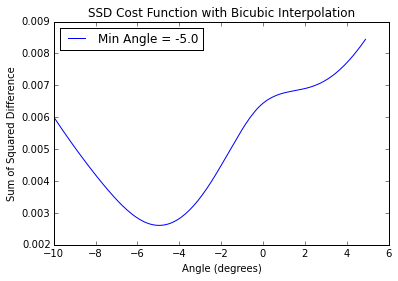

In [291]:
thetas = np.arange(-10,5,0.1)
cost_func  = rot_cost_func(vol1,vol2,thetas, 'bicubic')
            
angMin = thetas[np.argmin(cost_func,axis=0)]
plt.plot(thetas, cost_func, 'blue',label='Min Angle = %s' %(angMin))

plt.title('SSD Cost Function with Bicubic Interpolation')
plt.xlabel('Angle (degrees)')
plt.ylabel('Sum of Squared Difference')
plt.legend(loc='best')
plt.show()

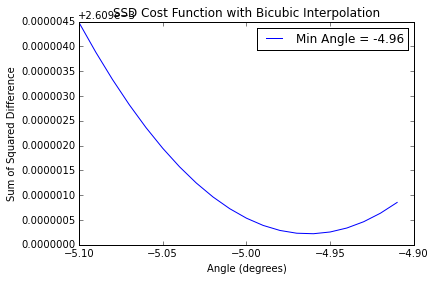

In [293]:
thetas = np.arange(-5.1,-4.9,0.01)
cost_func  = rot_cost_func(vol1,vol2,thetas, 'bicubic')
            
angMin = thetas[np.argmin(cost_func,axis=0)]
plt.plot(thetas, cost_func, 'blue',label='Min Angle = %s' %(angMin))

plt.title('SSD Cost Function with Bicubic Interpolation')
plt.xlabel('Angle (degrees)')
plt.ylabel('Sum of Squared Difference')
plt.legend(loc='best')
plt.show()

In [300]:
thetas = np.arange(-10,5,0.1)
cost_func_6_4 = rot_cost_func(list_6_4mm[0],list_6_4mm[3],thetas, 'bicubic')
cost_func_8 = rot_cost_func(list_8mm[0],list_8mm[3],thetas, 'bicubic')
cost_func_10 = rot_cost_func(list_10mm[0],list_10mm[3],thetas, 'bicubic')

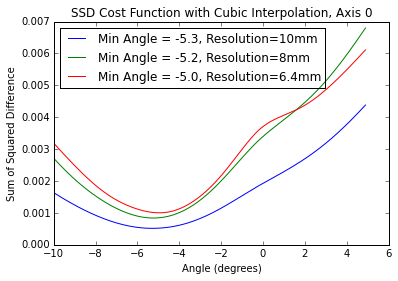

In [301]:
angMin = thetas[np.argmin(cost_func_10,axis=0)]
plt.plot(thetas, cost_func_10, 'blue',label='Min Angle = %s, Resolution=10mm' %(angMin))

angMin = thetas[np.argmin(cost_func_8,axis=0)]
plt.plot(thetas, cost_func_8, 'green',label='Min Angle = %s, Resolution=8mm' %(angMin))

angMin = thetas[np.argmin(cost_func_6_4,axis=0)]
plt.plot(thetas, cost_func_6_4, 'red',label='Min Angle = %s, Resolution=6.4mm' %(angMin))

plt.title('SSD Cost Function with Cubic Interpolation, Axis 0')
plt.xlabel('Angle (degrees)')
plt.ylabel('Sum of Squared Difference')
plt.legend(loc='best')
plt.show()

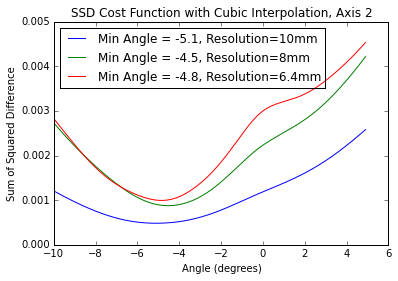

In [305]:
thetas = np.arange(-10,5,0.1)
cost_func_6_4 = rot_cost_func2(list_6_4mm[0],list_6_4mm[2],thetas, 'bicubic')
cost_func_8 = rot_cost_func2(list_8mm[0],list_8mm[2],thetas, 'bicubic')
cost_func_10 = rot_cost_func2(list_10mm[0],list_10mm[2],thetas, 'bicubic')

angMin = thetas[np.argmin(cost_func_10,axis=0)]
plt.plot(thetas, cost_func_10, 'blue',label='Min Angle = %s, Resolution=10mm' %(angMin))

angMin = thetas[np.argmin(cost_func_8,axis=0)]
plt.plot(thetas, cost_func_8, 'green',label='Min Angle = %s, Resolution=8mm' %(angMin))

angMin = thetas[np.argmin(cost_func_6_4,axis=0)]
plt.plot(thetas, cost_func_6_4, 'red',label='Min Angle = %s, Resolution=6.4mm' %(angMin))

plt.title('SSD Cost Function with Cubic Interpolation, Axis 2')
plt.xlabel('Angle (degrees)')
plt.ylabel('Sum of Squared Difference')
plt.legend(loc='best')
plt.show()

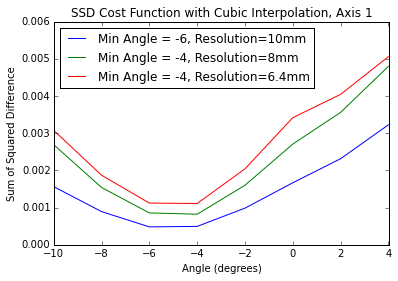

In [306]:
thetas = np.arange(-10,5,2)
cost_func_6_4 = rot_cost_func1(list_6_4mm[0],list_6_4mm[1],thetas, 'bicubic')
cost_func_8 = rot_cost_func1(list_8mm[0],list_8mm[1],thetas, 'bicubic')
cost_func_10 = rot_cost_func1(list_10mm[0],list_10mm[1],thetas, 'bicubic')

angMin = thetas[np.argmin(cost_func_10,axis=0)]
plt.plot(thetas, cost_func_10, 'blue',label='Min Angle = %s, Resolution=10mm' %(angMin))

angMin = thetas[np.argmin(cost_func_8,axis=0)]
plt.plot(thetas, cost_func_8, 'green',label='Min Angle = %s, Resolution=8mm' %(angMin))

angMin = thetas[np.argmin(cost_func_6_4,axis=0)]
plt.plot(thetas, cost_func_6_4, 'red',label='Min Angle = %s, Resolution=6.4mm' %(angMin))

plt.title('SSD Cost Function with Cubic Interpolation, Axis 1')
plt.xlabel('Angle (degrees)')
plt.ylabel('Sum of Squared Difference')
plt.legend(loc='best')
plt.show()

In [64]:
from rotation_2d import imrotate,rot_cost_func

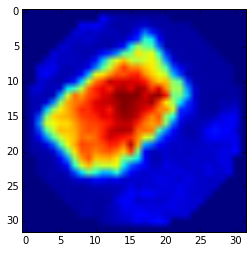

In [37]:
im1 = list_8mm[0].max(axis=0)
plt.imshow(imrotate(im1,45,interpolation='bicubic',mask=True))

In [73]:
from rotation_3d import volrotate,rot_cost_func_3d

In [74]:
thetas=[[10,5,10]]
cost_func = rot_cost_func_3d(list_8mm[0],list_8mm[2],thetas)

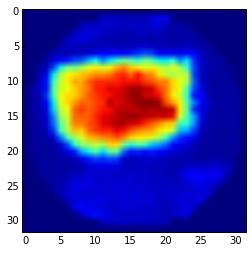

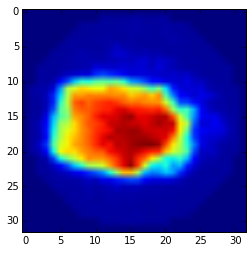

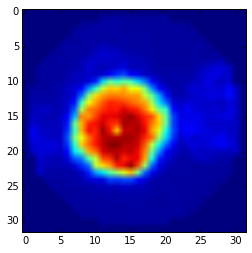

In [69]:
dest = volrotate(list_8mm[0], 10, 10, 10, mask=True)
plt.imshow(dest.max(axis=0))
plt.show()
plt.imshow(dest.max(axis=1))
plt.show()
plt.imshow(dest.max(axis=2))
plt.show()